In [3]:
import numpy as np
import pandas as pd

from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import mglearn
plt.style.use('seaborn-whitegrid')


In [4]:
# As train data is huge reading all data would require a lot of memory 
# Threfore read a limited number of rows while exploring the data
# Exploration code is ready to Re-run the notebook while reading more rows

df_train = pd.read_csv("C:/taxi_train.csv",nrows=2000000,parse_dates=["pickup_datetime"])
print("shape : {}".format(df_train.shape)) 

shape : (2000000, 8)


In [5]:
#data type 확인
df_train.dtypes

key                          object
fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [9]:
"""

Topic of data handling 

1. fare_amount.min() : minus value --> drop fare_amount is -(value) 
2. Remove data having Null value 
3. Remove data having 'passenger_count' value is 0
4. Minimum longitude/lattitude coordinates are way off --> remove them
5 .Average fare_amount is about $11.4 with a standard deviation of $9.853 
6 .building a predictive model better than $9.853 

"""

df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.999923e+06,1.999923e+06,1.999923e+06,1.999909e+06,1.999909e+06,1.999923e+06
mean,1.134852e+01,-7.252327e+01,3.992966e+01,-7.252415e+01,3.992819e+01,1.684111e+00
std,9.852062e+00,1.286798e+01,7.983354e+00,1.277449e+01,1.032374e+01,1.314979e+00
min,0.000000e+00,-3.377681e+03,-3.458665e+03,-3.383297e+03,-3.461541e+03,0.000000e+00
25%,6.000000e+00,-7.399208e+01,4.073491e+01,-7.399141e+01,4.073400e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075312e+01,1.000000e+00
75%,1.250000e+01,-7.396713e+01,4.076710e+01,-7.396369e+01,4.076809e+01,2.000000e+00
max,1.273310e+03,2.856442e+03,2.621628e+03,3.414307e+03,3.345917e+03,2.080000e+02


In [11]:

# 1.fare_amount.min() : minus value --> drop fare_amount is -(value) 

print("old : {}".format(len(df_train)))# 2000000

df_train = df_train[df_train.fare_amount>=0]
print("new : {}".format(len(df_train))) # 1999923

old : 1999923
new : 1999923


Text(0.5,1,'Histogram')

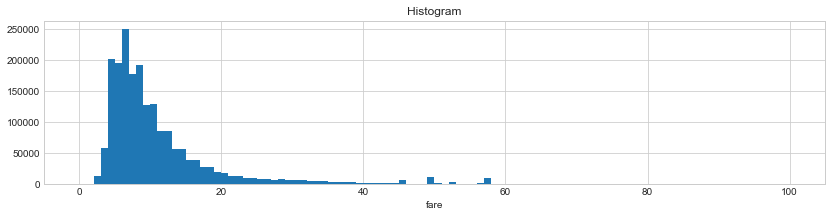

In [12]:
# plot histogram of fare #

df_train[df_train.fare_amount<100].fare_amount.hist(bins=100,figsize=(14,3))
plt.xlabel('fare')
plt.title('Histogram') 

In [13]:
# 2. Removing missing data ##

# As this dataset is huge, removing datapoints with missing data probably has no effect on the models beings trained.

print(df_train.isnull().sum().sort_values(0,ascending=False))
print()

df_train = df_train.dropna(how='any',axis='rows')
print("new : {}".format(len(df_train))) # 1999909


dropoff_latitude     14
dropoff_longitude    14
passenger_count       0
pickup_latitude       0
pickup_longitude      0
pickup_datetime       0
fare_amount           0
key                   0
dtype: int64

new : 1999909


In [14]:
# 3. Remove data having 'passenger_count' value is 0 #


print("old : {}".format(len(df_train))) # 1999909

df_train = df_train[-(df_train.passenger_count <=0)] 
print("new : {}".format(len(df_train))) # 1992800

old : 1999909
new : 1992800


In [15]:
"""
Add two new features 'abs_diff_longitude' and 'abs_diff_latitude' representing the 'Manhattan vector'
from the pickup location to dropoff location
"""

def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()

add_travel_vector_features(df_train) 


In [16]:
df_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754


In [17]:
## Explore and prune outliers ##

df_train.isnull().sum().to_frame().sort_values(0,ascending=False)


,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0
abs_diff_longitude,0
abs_diff_latitude,0


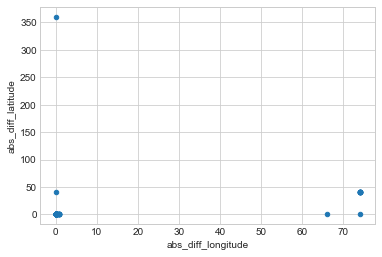

In [18]:

"""
most of values should be very small
because it should all be differences between GPS coordinates within one city.

"""

plot = df_train.iloc[:10000].plot.scatter('abs_diff_longitude','abs_diff_latitude')
plot

In [19]:
# one degree of latitude is about 69 miles. 
# Based on the scatterplot, safely exclude values above 5

print(len(df_train[(df_train.abs_diff_longitude >= 5.0) & (df_train.abs_diff_latitude >= 5.0)])) # 3310

df_train = df_train[(df_train.abs_diff_longitude < 5.0) & (df_train.abs_diff_latitude < 5.0)]


3310


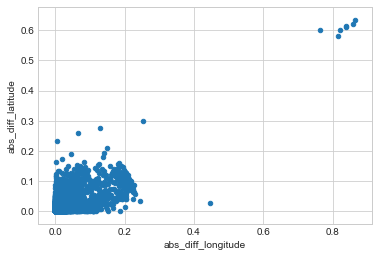

In [14]:

plot = df_train.iloc[:10000].plot.scatter('abs_diff_longitude','abs_diff_latitude')
plot # 0 <= (abs_diff_longitude, abs_diff_latitude) < 1 #


In [20]:
# find (abs_diff_longitude = 0) and (abs_diff_latitude = 0) #

df_train[(df_train.abs_diff_longitude == 0) & (df_train.abs_diff_latitude == 0)]


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude
11,2012-12-24 11:24:00.00000098,5.50,2012-12-24 11:24:00,0.000000,0.000000,0.000000,0.000000,3,0.0,0.0
15,2013-11-23 12:57:00.000000190,5.00,2013-11-23 12:57:00,0.000000,0.000000,0.000000,0.000000,1,0.0,0.0
26,2011-02-07 20:01:00.000000114,6.50,2011-02-07 20:01:00,0.000000,0.000000,0.000000,0.000000,1,0.0,0.0
105,2009-03-25 00:08:52.0000001,52.00,2009-03-25 00:08:52,-74.035839,40.747320,-74.035839,40.747320,1,0.0,0.0
124,2013-01-17 17:22:00.00000043,8.00,2013-01-17 17:22:00,0.000000,0.000000,0.000000,0.000000,2,0.0,0.0
191,2014-01-08 21:55:58.0000006,6.50,2014-01-08 21:55:58,-73.998488,40.726303,-73.998488,40.726303,1,0.0,0.0
192,2010-09-05 17:08:00.00000092,3.70,2010-09-05 17:08:00,0.000000,0.000000,0.000000,0.000000,5,0.0,0.0
233,2011-07-24 01:14:35.0000002,8.50,2011-07-24 01:14:35,0.000000,0.000000,0.000000,0.000000,2,0.0,0.0
270,2012-08-25 01:53:42.0000005,7.50,2012-08-25 01:53:42,-73.995892,40.746454,-73.995892,40.746454,1,0.0,0.0
273,2009-10-30 18:13:00.00000021,8.10,2009-10-30 18:13:00,0.000000,0.000000,0.000000,0.000000,4,0.0,0.0


In [21]:
# Remove (abs_diff_longitude = 0) and (abs_diff_latitude = 0) #

print(len(df_train[(df_train.abs_diff_longitude == 0) & (df_train.abs_diff_latitude == 0)])) # 56696
df_train = df_train[-((df_train.abs_diff_longitude == 0) & (df_train.abs_diff_latitude == 0))]
print(len(df_train))


56696
1932138


In [23]:
## Visualization ##

### Test data ###

df_test = pd.read_csv("C:/taxi_test.csv",parse_dates=["pickup_datetime"])
df_test.describe()

df_test.isnull().sum().to_frame() # no missing value 


,0
key,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [26]:
### Location data ###

## Easy to use map and GPS tool: https://www.gps-coordinates.net/ 
## Calculate distance between locations: https://www.travelmath.com/flying-distance/
## Open street map to grab using bouding box a map: https://www.openstreetmap.org/export#map=8/52.154/5.295

#### Handling some of minimun and maxinum longitude/lattitude coordinates being way off ####

## new york 좌표 틀 : https://ko.wikipedia.org/wiki/%ED%8B%80:%EC%9C%84%EC%B9%98_%EC%A7%80%EB%8F%84_%EB%AF%B8%EA%B5%AD_%EB%89%B4%EC%9A%95 ##

## first method(breemen way) : Define a bounding box of interest by [long_min,long_max,latt_min,latt_max] using the minimum and maximum coordinates form the testset
 # --> This way, he think that being able to train a model for the full pickup/dropoff coordinate range of the test set

## Second method(my thought): new york 좌표 틀 이용 --> [long_min,long_max,latt_min,latt_max]  : [-74.27,-73.68,40.49,40.92]

# minimum and maximum longitude test set #

min(df_test.pickup_longitude.min(), df_test.dropoff_longitude.min()), \
max(df_test.pickup_longitude.max(), df_test.dropoff_longitude.max()) # (-74.263242, -72.986532) #


(-74.263242, -72.986532)

In [27]:

# minimum and maximum latitude test set #

min(df_test.pickup_latitude.min(), df_test.dropoff_latitude.min()), \
max(df_test.pickup_latitude.max(), df_test.dropoff_latitude.max()) # (40.568973, 41.709555) #


(40.568973, 41.709555)

In [28]:
# for the first way #

def select_within_boundingbox(df, BB):
    # BB[0] : min(df_test.pickup_longitude) / BB[1] : min(df_test.dropoff_longitude)
    # BB[2] : max(df_test.pickup_longitude) / BB[3] : max(df_test.dropofff_longitude)
    
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])    

In [29]:
# load imageg of NYC map #

BB = (-74.5,-72.8,40.5,41.8) # Q) : Why doesn't use max and min value of testset
nyc_map = plt.imread('https://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png')

# load extra image to zoon in on NYC #

BB_zoom = (-74.3,-73.7,40.5,40.9)
nyc_map_zoom = plt.imread('https://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png')

In [30]:

print("old size : {}".format(len(df_train))) # old size : 1999909
print()

df_train = df_train[select_within_boundingbox(df_train,BB)] # test set에 들어 있는 pickup 관련 최대,최소 경위도와 dropoff 관련 최대,최소 경위도 안에 있는 경위도를 trainset의 범위로 산정
print("new size : {}".format(len(df_train))) # new size : 1957918


old size : 1932138

new size : 1930192


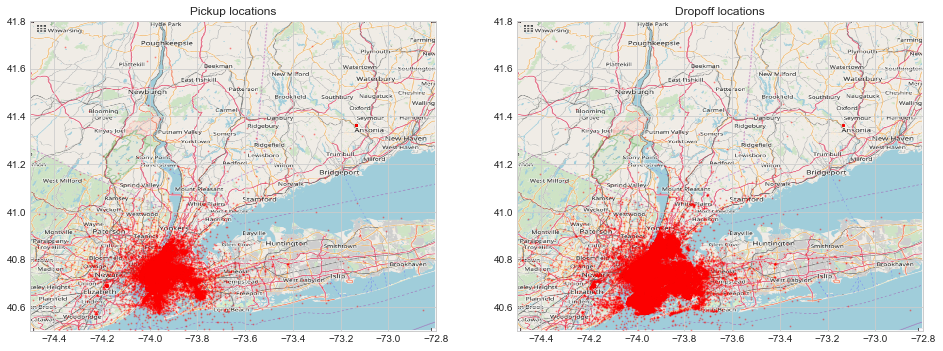

In [23]:
# For plotting data on the NYC map #

def plot_on_map(df,BB,nyc_map,s=10,alpha=0.2):
    fig, axs = plt.subplots(1,2,figsize=(16,10))
    axs[0].scatter(df.pickup_longitude,df.pickup_latitude,zorder=1,alpha=alpha,c='r',s=s)
    axs[0].set_xlim((BB[0],BB[1]))
    axs[0].set_ylim((BB[2],BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].imshow(nyc_map,zorder=0,extent=BB)
    
    axs[1].scatter(df.dropoff_longitude,df.dropoff_latitude,zorder=1,alpha=alpha,c='r',s=s)
    axs[1].set_xlim((BB[0],BB[1]))
    axs[1].set_ylim((BB[2],BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_map,zorder=0,extent=BB)       
    
# Plot training data on map #

plot_on_map(df_train,BB,nyc_map,s=1,alpha=0.3)

In [31]:
# Generate 'abs_diff_longitude', 'abs_diff_latitude' #  

add_travel_vector_features(df_test)    
df_test

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,0.008110,0.019970
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,0.012024,0.019817
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,0.002870,0.005121
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,0.009288,0.016172
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,0.022519,0.045348
5,2012-12-01 21:12:12.0000005,2012-12-01 21:12:12,-73.960983,40.765547,-73.979177,40.740053,1,0.018194,0.025494
6,2011-10-06 12:10:20.0000001,2011-10-06 12:10:20,-73.949013,40.773204,-73.959622,40.770893,1,0.010609,0.002311
7,2011-10-06 12:10:20.0000003,2011-10-06 12:10:20,-73.777282,40.646636,-73.985083,40.759368,1,0.207801,0.112732
8,2011-10-06 12:10:20.0000002,2011-10-06 12:10:20,-74.014099,40.709638,-73.995106,40.741365,1,0.018993,0.031727
9,2014-02-18 15:22:20.0000002,2014-02-18 15:22:20,-73.969582,40.765519,-73.980686,40.770725,1,0.011104,0.005206


In [32]:
df_test = df_test[-((df_test.abs_diff_longitude == 0) & (df_test.abs_diff_latitude == 0))]

In [33]:
df_test = df_test[(df_test.abs_diff_longitude < 5.0) & (df_test.abs_diff_latitude < 5.0)]

In [34]:
df_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude
count,9829.000000,9829.000000,9829.000000,9829.000000,9829.000000,9829.000000,9829.000000
mean,-73.975177,40.750779,-73.974102,40.751487,1.670668,0.023550,0.022324
std,0.039231,0.031166,0.035135,0.033218,1.278280,0.036813,0.025616
min,-74.252193,40.573143,-74.263242,40.568973,1.000000,0.000000,0.000005
25%,-73.992569,40.736084,-73.991275,40.735196,1.000000,0.006500,0.007436
50%,-73.982365,40.753045,-73.980083,40.754056,1.000000,0.013257,0.014855
75%,-73.968173,40.767043,-73.964295,40.768748,2.000000,0.024717,0.028399
max,-72.986532,41.709555,-72.990963,41.696683,6.000000,0.849168,0.633213


In [35]:
trainy = df_train.iloc[:,1]
trainx = df_train.iloc[:,[8,9]]
X_test = df_test.iloc[:,[7,8]]

In [36]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(trainx,trainy)

print("lr_coef : {}".format(lr.coef_))
print()
print("lr_intercept : {}".format(lr.intercept_))


lr_coef : [167.11321628 119.25556854]

lr_intercept : 4.916608978990668


In [37]:
print("train score : {}".format(lr.score(trainx,trainy)))
print()

train score : 0.6752051100943036



In [38]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(trainx,trainy) # default value of alpha = 1.0
print("trainset score : {}".format(ridge.score(trainx,trainy)))


trainset score : 0.6752050248978505


In [ ]:

## Alpha 매개 변수를 어떻게 설정해야 가장 좋은 성능을 가진 모델을 가질 수 있을까? ##

# 간단한 Grid Search 방법 : for() #

train_accuracy = []

for alpha in np.arange(0,30,0.05):
    # generate model
    ridge = Ridge(alpha = alpha).fit(trainx,trainy)
    # append accuracy of trainset
    train_accuracy.append(ridge.score(trainx,trainy))
    

In [ ]:

plt.plot(np.arange(0,30,0.05),train_accuracy,label = "train accuracy")
plt.ylabel("accuracy")
plt.xlabel("alpha")
plt.legend()

In [ ]:
train_accuracy = pd.DataFrame({'accuracy':train_accuracy,'index' : np.arange(0,30,0.05)})
train_accuracy

In [ ]:
train_accuracy.max() # 

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(trainx,trainy) # In Lasso default value of alpha is 1 
print("train set score : {}".format(lasso.score(trainx,trainy)))
print("feature number : {}".format(np.sum(lasso.coef_ !=0)))


In [ ]:

## 과소적합 방지를 위해 alpha값을 줄인다. ##

# 1. max_iter(반복 실행하는 최대 횟수)의 기본값을 늘린다. #

lasso001 = Lasso(alpha = 0.01,max_iter = 100000).fit(trainx,trainy)
print("train set score : {}".format(lasso001.score(trainx,trainy)))
print("feature number : {}".format(np.sum(lasso001.coef_ !=0))) # 2

# Alpha값을 너무 낮추면 규제 효과가 사라져 과대적합이 되므로 OLS 방식과 비슷해 진다. #

lasso00001 = Lasso(alpha = 0.0001,max_iter = 100000).fit(trainx,trainy)
print("train set score : {}".format(lasso00001.score(trainx,trainy)))
print("feature number : {}".format(np.sum(lasso00001.coef_ !=0))) # 2 